In [ ]:
# repeat copy 
import os
import shutil
directory = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/heart/train'
src = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/output.png'
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if src != f:
        shutil.copy(src, f)

In [ ]:
frame = {
            "file_path": "./train/",
            "warp_id": -1,
            "rotation": 0.012566370614359171,
            "transform_matrix": [
                [
                    -0.9999021887779236,
                    0.004192245192825794,
                    -0.013345719315111637,
                    -0.05379832163453102
                ],
                [
                    -0.013988681137561798,
                    -0.2996590733528137,
                    0.95394366979599,
                    3.845470428466797
                ],
                [
                    -4.656612873077393e-10,
                    0.9540371894836426,
                    0.29968830943107605,
                    1.2080823183059692
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    1.0
                ]
            ]
        }

In [113]:
import json 
import os


dataset = 'blur'
ver = 'train'
filename  = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/'+dataset+'/transforms_'+ver+'.json'
filename2 = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/'+dataset+'/transforms_'+ver+'2.json'
with open(filename, 'r') as f:
    data = json.load(f)
    frames = []
    frame = data['frames'][0]

    for i in range(50): #range(len(data['frames'])):
        # x = frame.copy()
        # x['file_path'] = data['frames'][i]['file_path'] #to keep og file path name
        if True: #i<len(data['frames']):
            x = frame.copy() #data['frames'][i].copy()
            x['warp_id'] = i
            x['file_path'] = ver+'/'+str(i).zfill(6)

            frames.append(x)
    
    data['frames'] = frames


# os.remove(filename)
with open(filename2, 'w') as f:
    json.dump(data, f, indent=4)

In [3]:
from PIL import Image
import os, sys

path = "/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/blur-smol/train/"
dirs = os.listdir( path )

for item in sorted(dirs):
    print(item)
    if os.path.isfile(path+item):
        im = Image.open(path+item)
        imResize = im.resize((200,200), Image.ANTIALIAS)
        imResize.save(path+item, 'PNG', quality=90)


000000.png
000001.png
000002.png
000003.png
000004.png
000005.png
000006.png
000007.png
000008.png
000009.png


/tmp/ipykernel_679279/1240160644.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imResize = im.resize((200,200), Image.ANTIALIAS)


000010.png
000011.png
000012.png
000013.png
000014.png
000015.png
000016.png
000017.png
000018.png
000019.png
000020.png
000021.png
000022.png
000023.png
000024.png
000025.png
000026.png
000027.png
000028.png
000029.png
000030.png
000031.png
000032.png
000033.png
000034.png
000035.png
000036.png
000037.png
000038.png
000039.png
000040.png
000041.png
000042.png
000043.png
000044.png
000045.png
000046.png
000047.png
000048.png
000049.png


In [ ]:
# generate b&w mask
import numpy as np 
from PIL import Image
 
im = Image.open('/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/heart/train/000000.png')
og = im.copy()
# display(og)
im = np.array(im)
im = im/2+150
if len(im.shape) == 2:
    im = np.stack((im,im,im),axis=-1)
im[:,:,0] = np.ones_like(im[:,:,0])
# im[:,:,1] = im[:,:,0]+150/2
# im[:,:,2] = im[:,:,0]/3
# im[:,:,3] = np.ones_like(im[:,:,3])*255
# imnp = im.copy()
im = Image.fromarray(im.astype('uint8'), 'RGB')
display(im)
im.save('/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/heart2/train/r_0.png')


In [ ]:
import numpy as np 
from PIL import Image

path = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/hearts/train/'
for item in sorted(os.listdir(path)):
    if os.path.isfile(path+item):
        im = Image.open(path+item)
        imResize = im.resize((800,800), resample=Image.BOX)
        imResize.save(path+item)

In [ ]:
import numpy as np 
from PIL import Image
import cv2 

img = 'data/hearts/train/Untitled.png'
im = Image.open(img)
# display(im)
img = np.array(im)
print(img.shape)
# print(np.unique(img.reshape((-1,3)), axis=0))

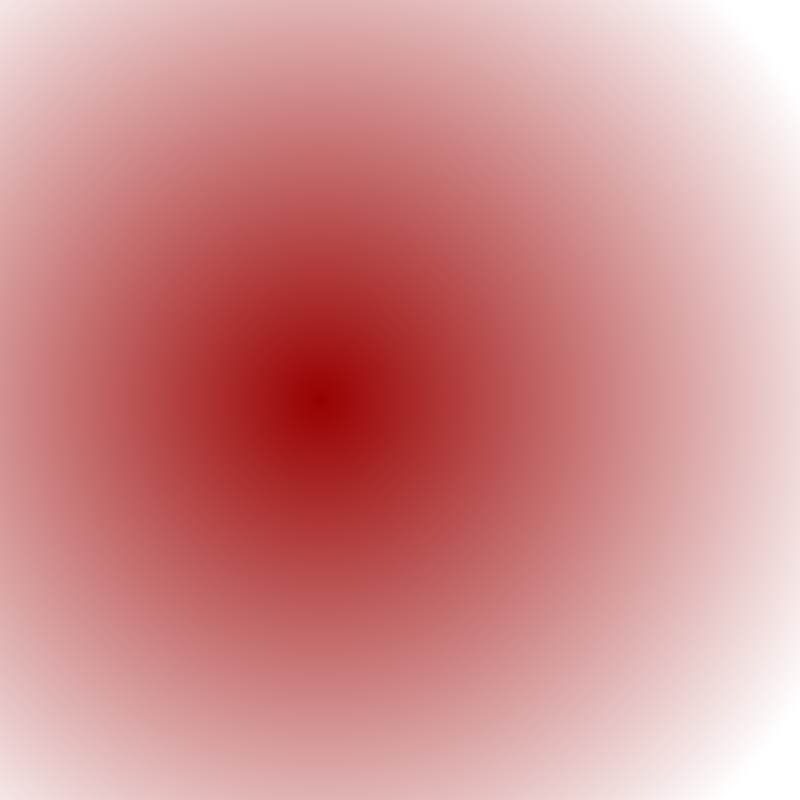

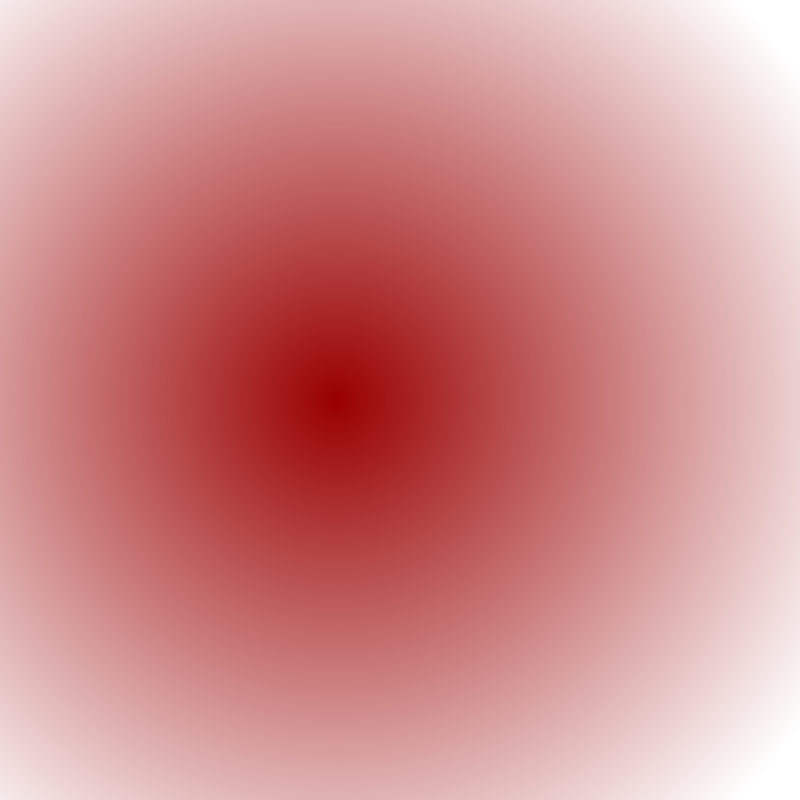

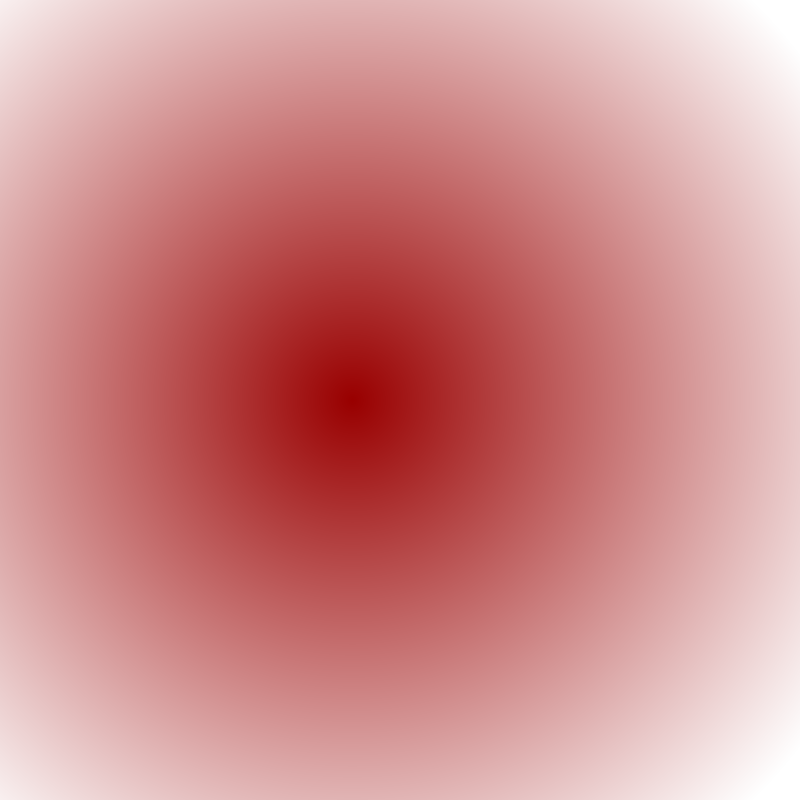

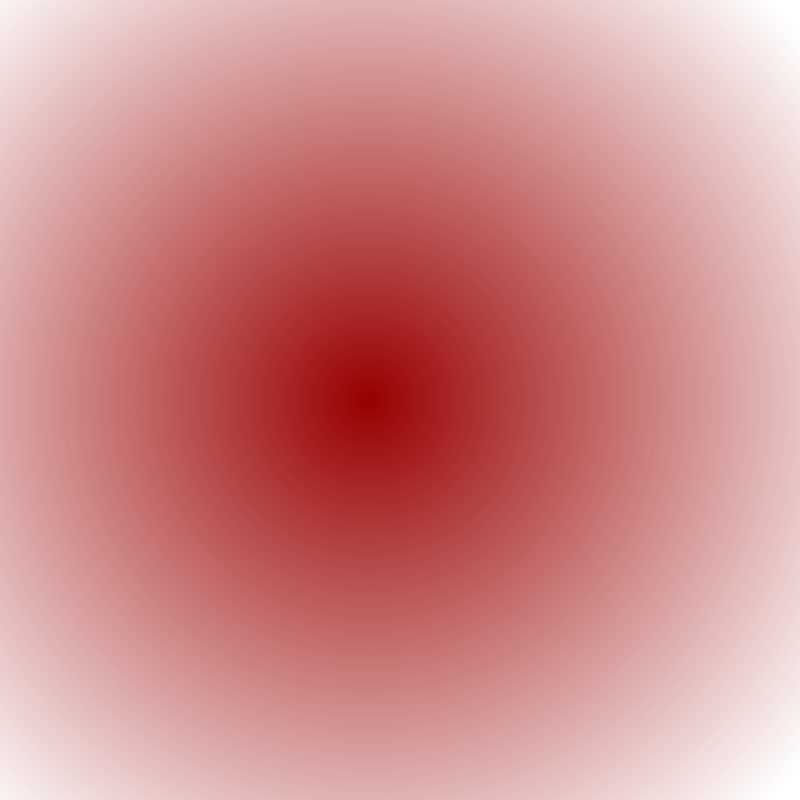

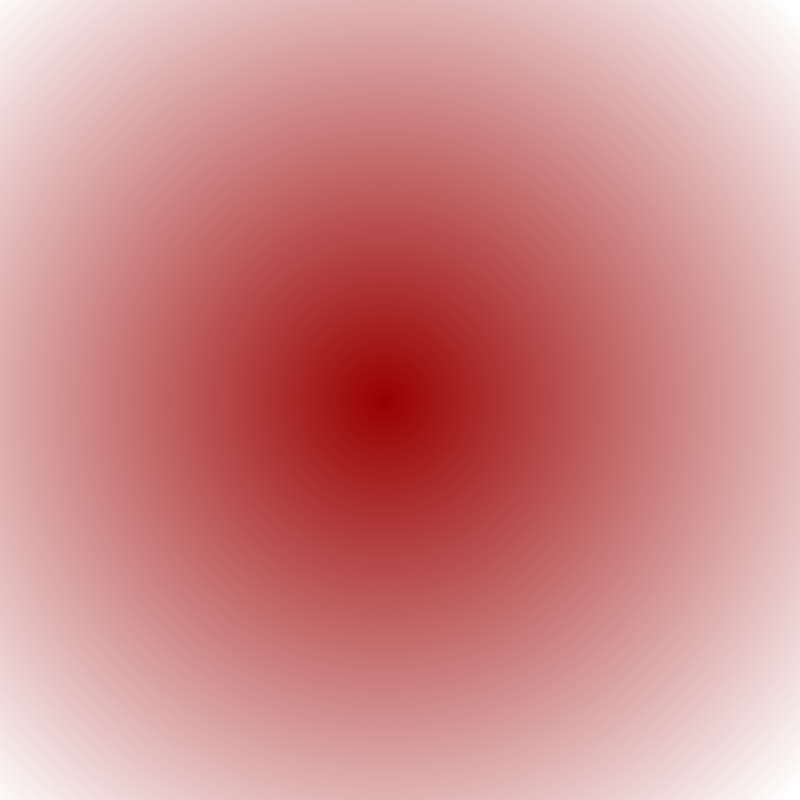

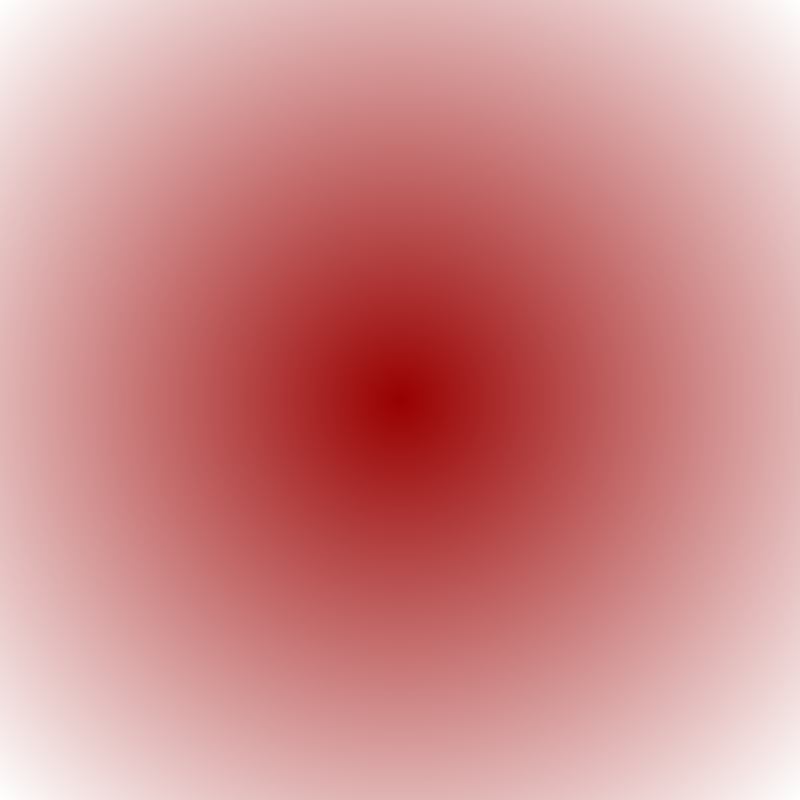

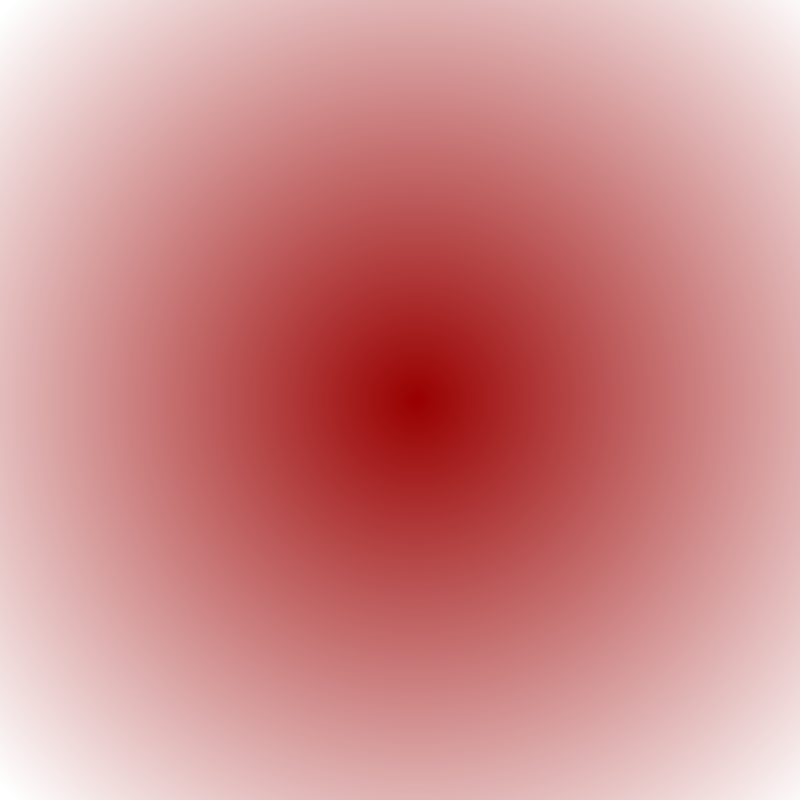

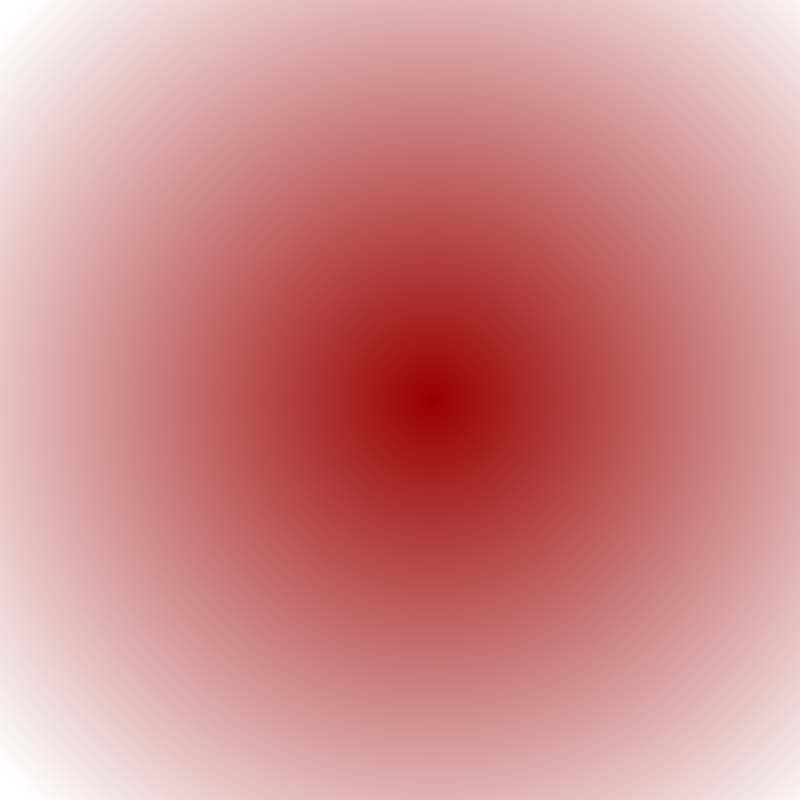

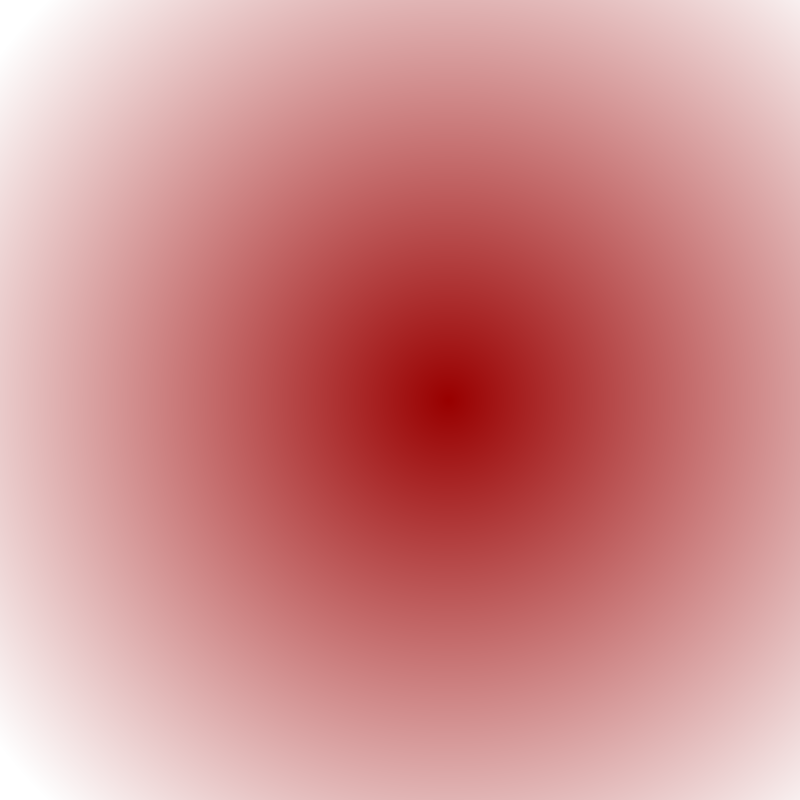

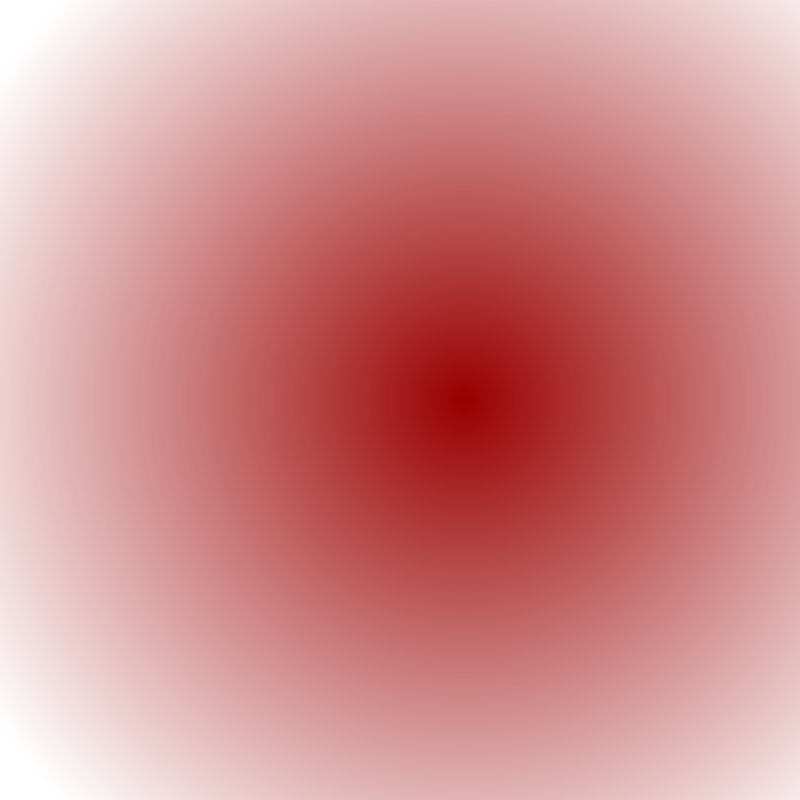

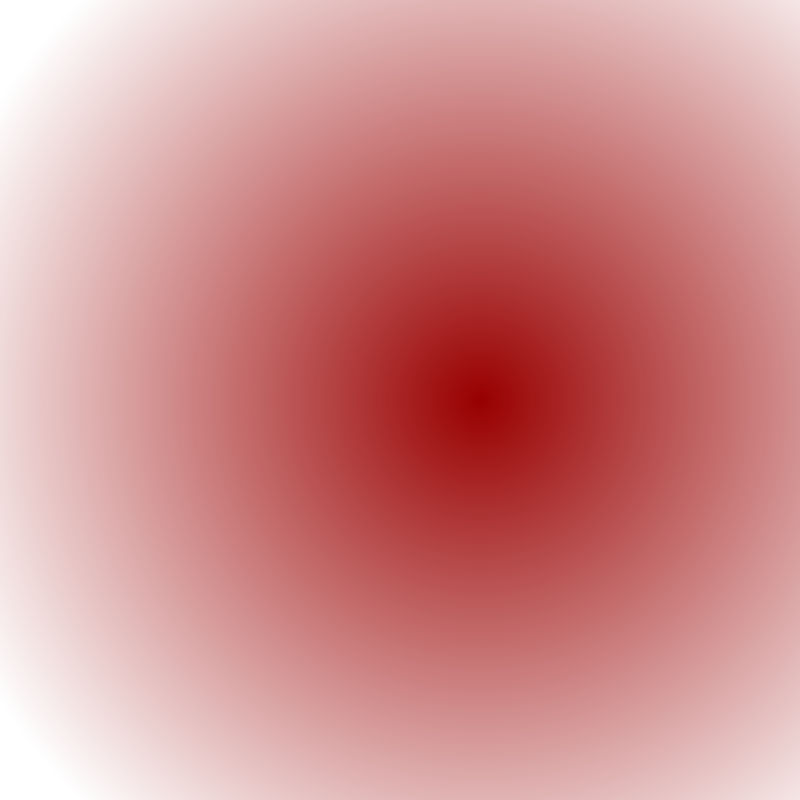

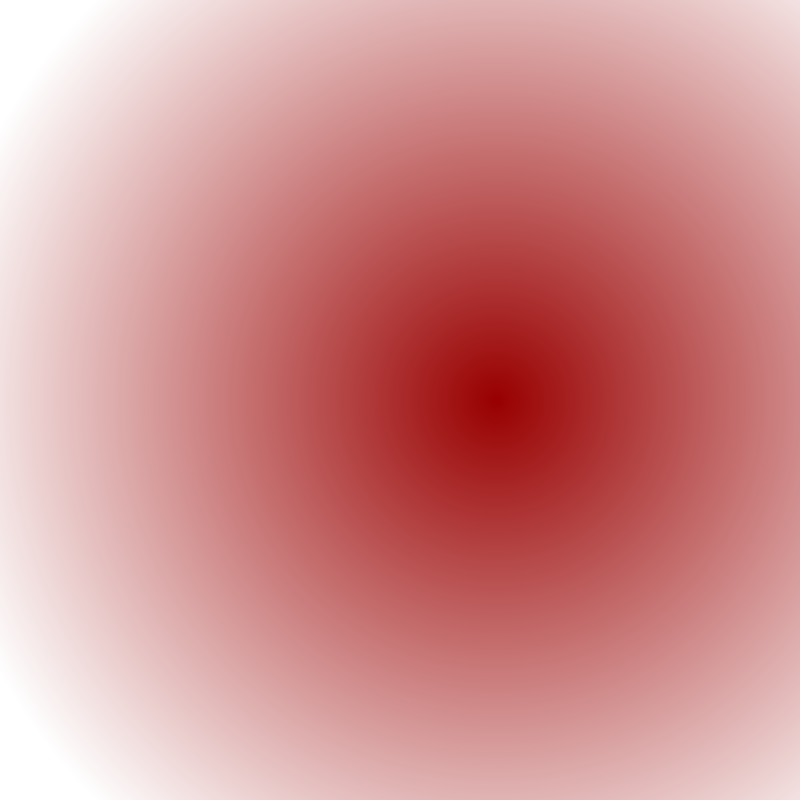

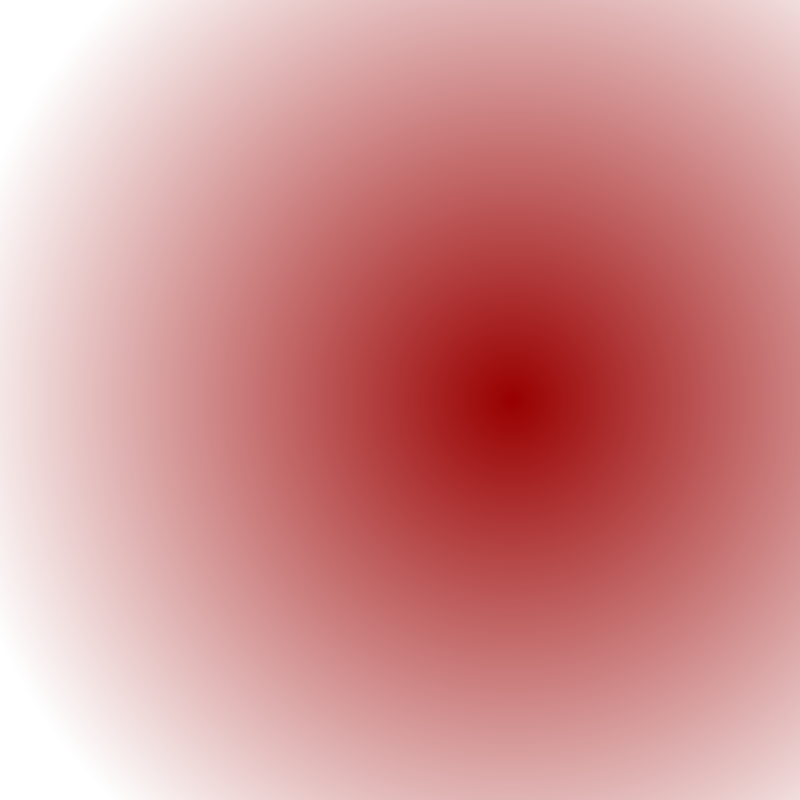

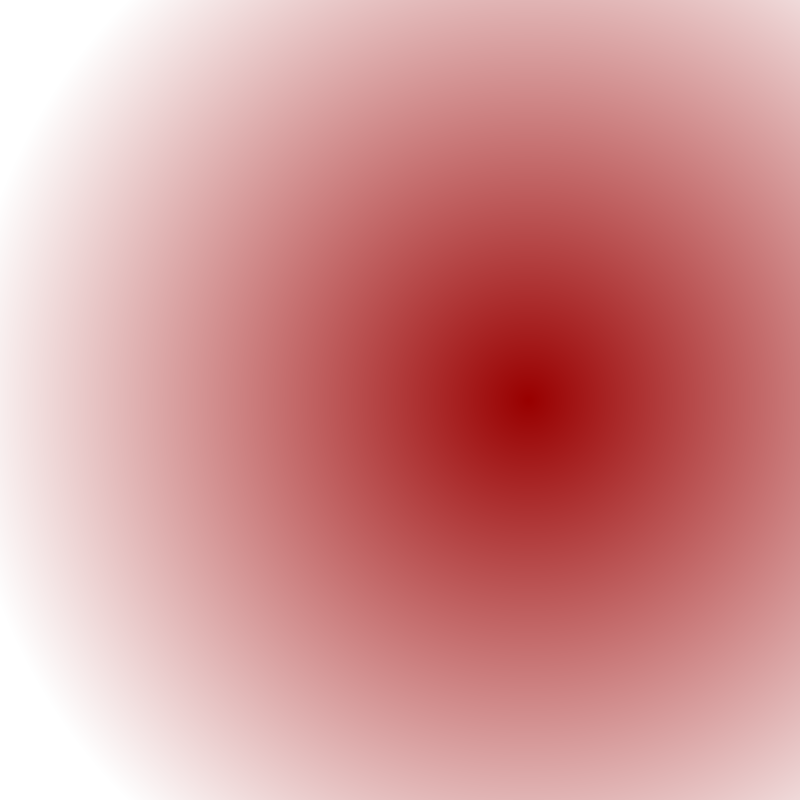

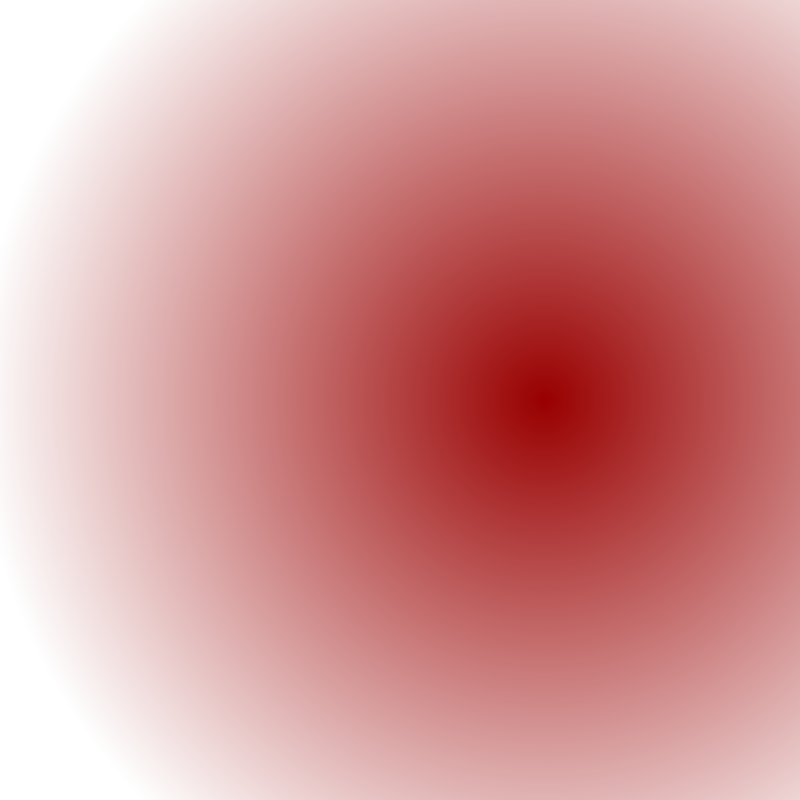

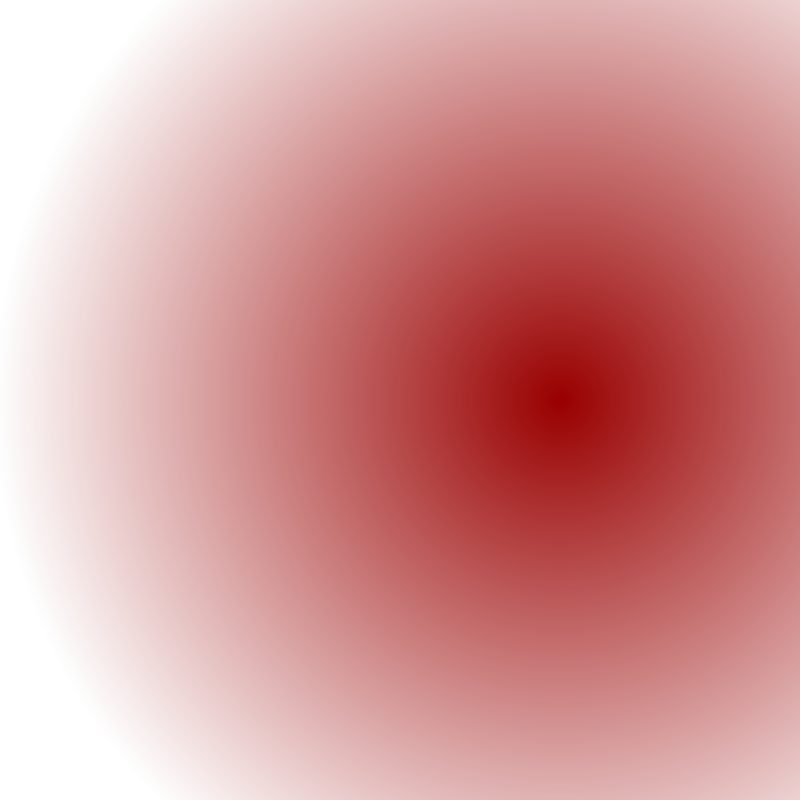

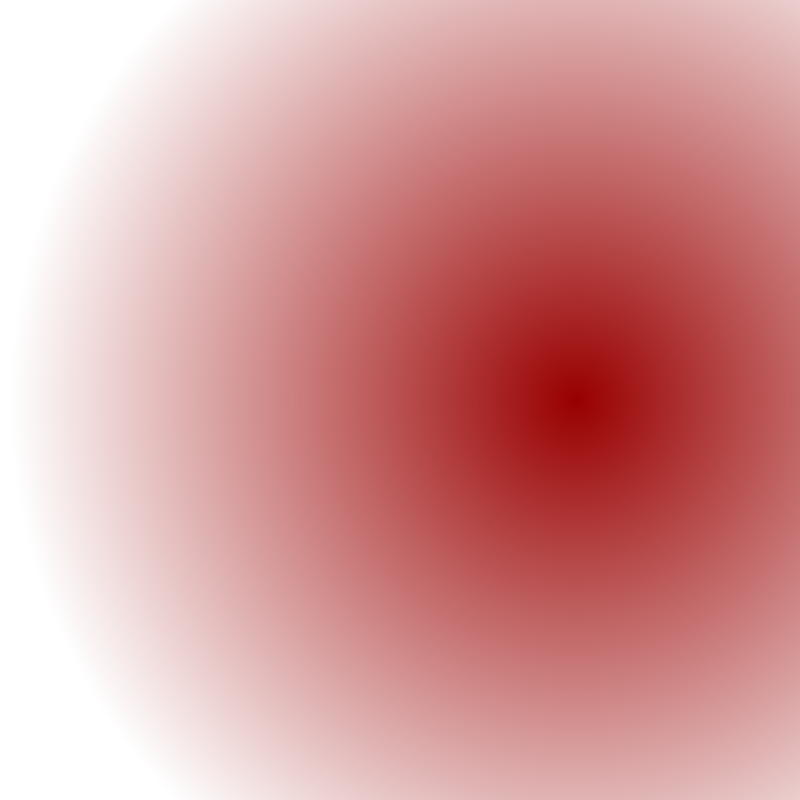

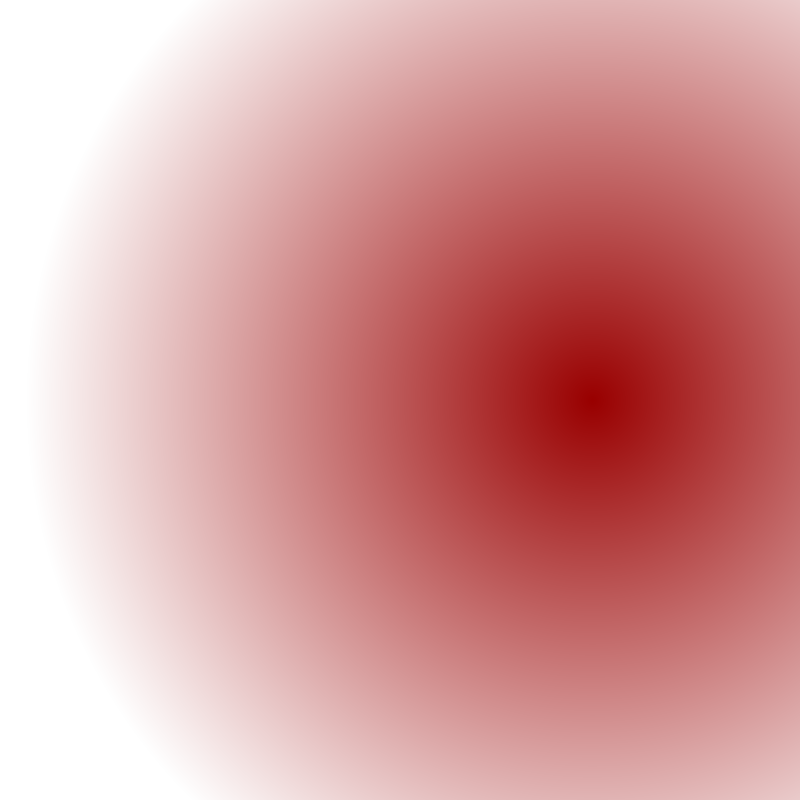

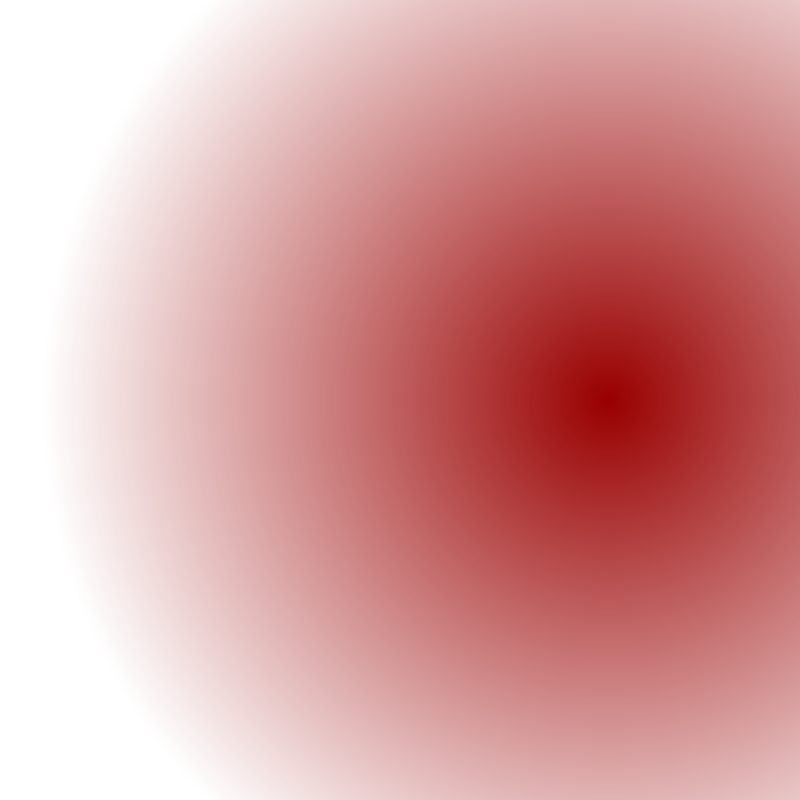

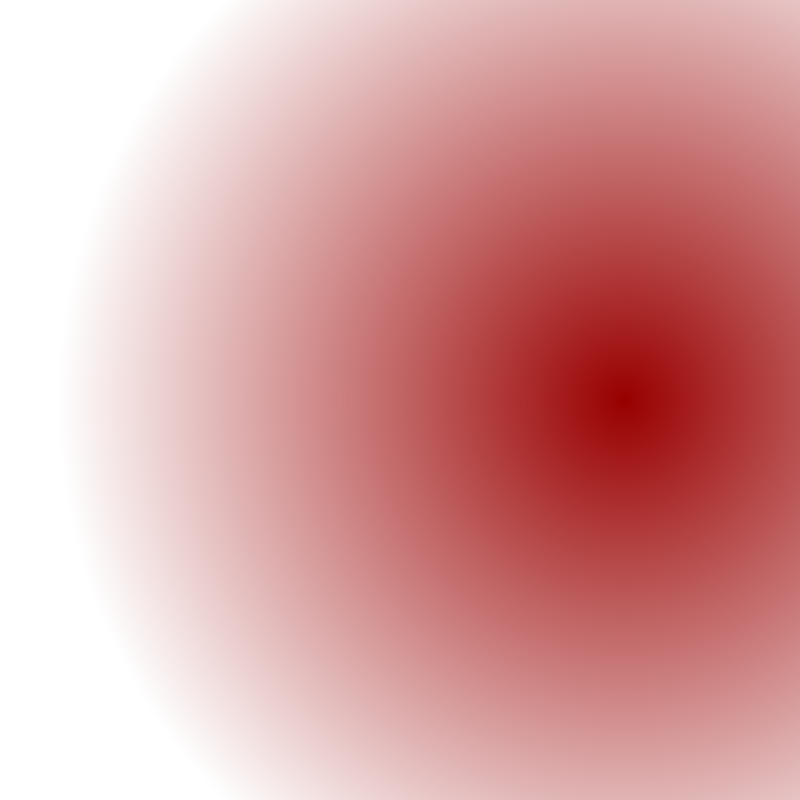

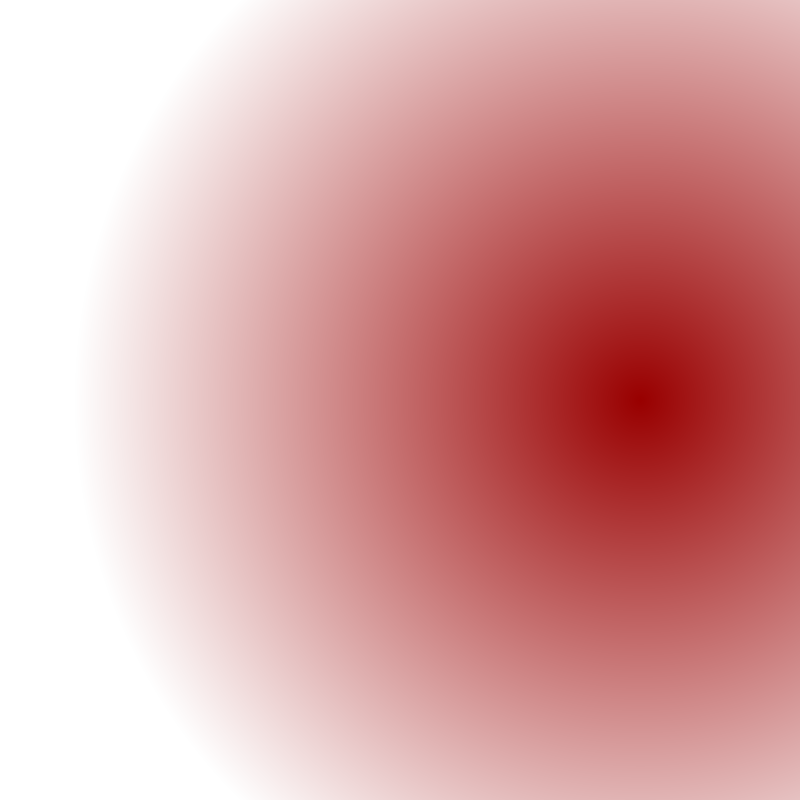

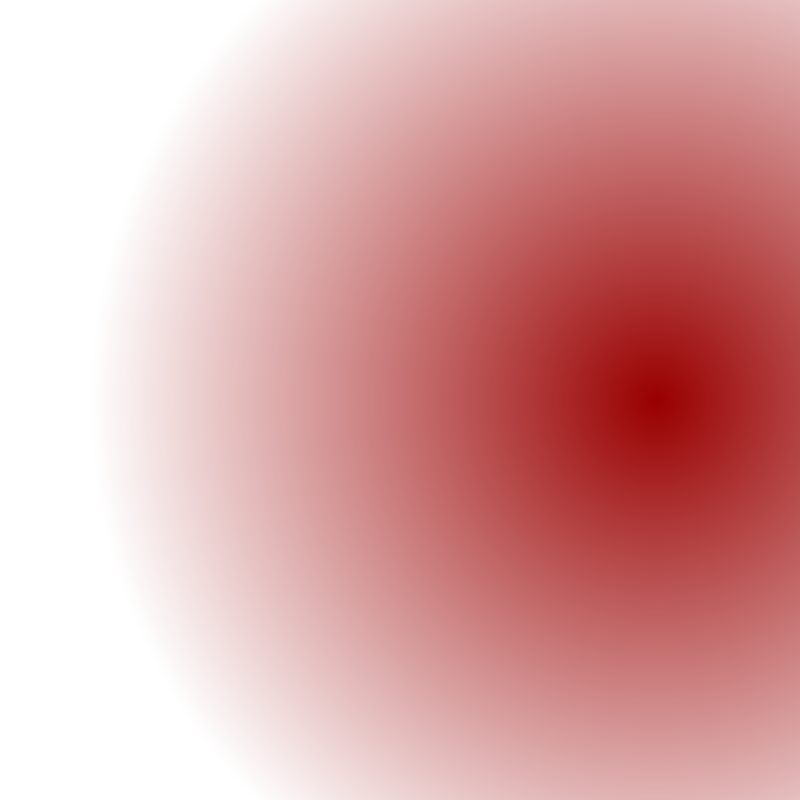

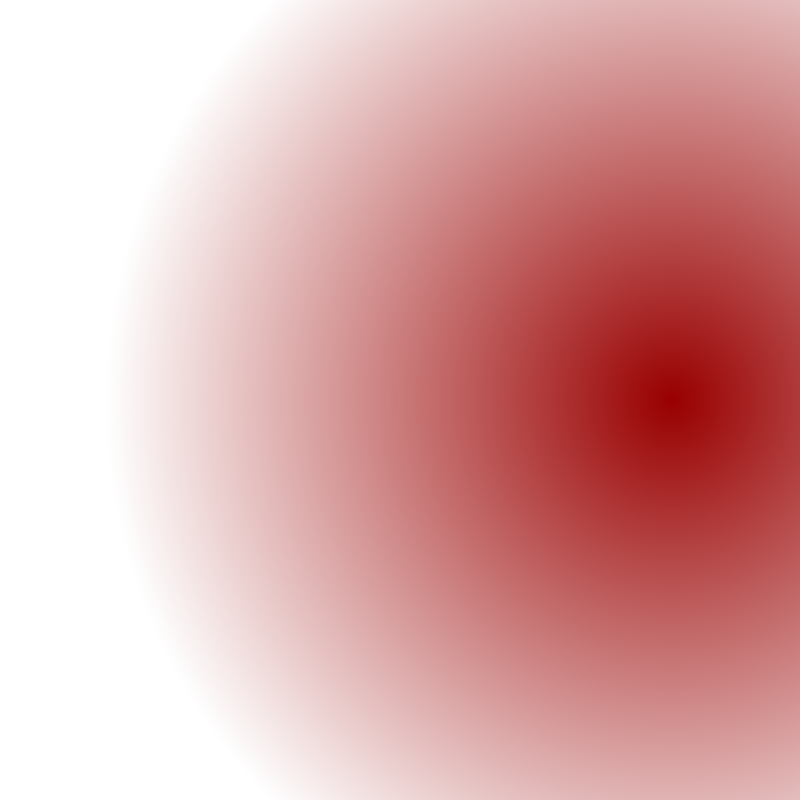

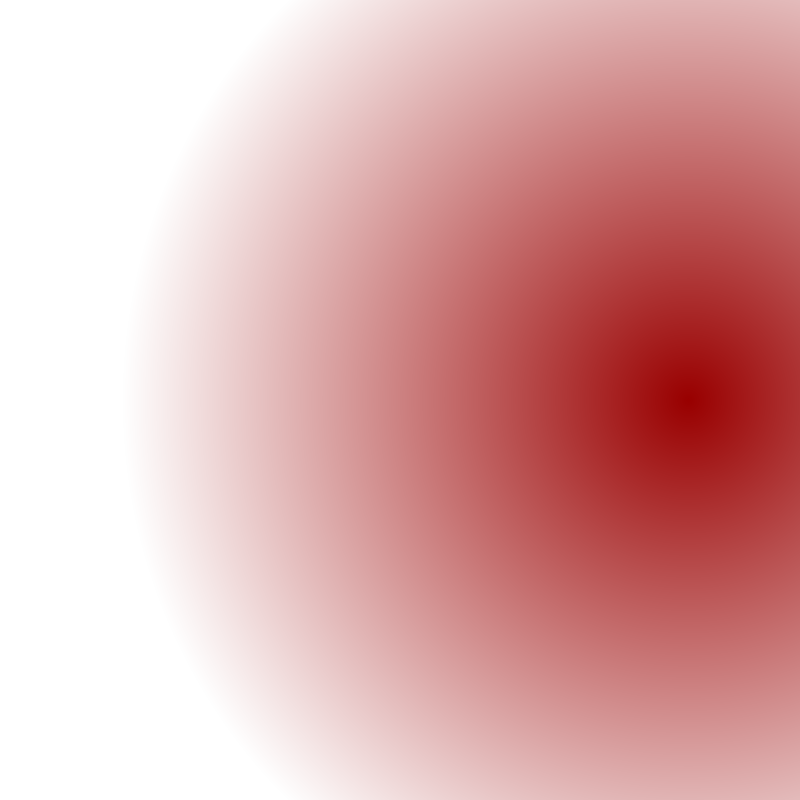

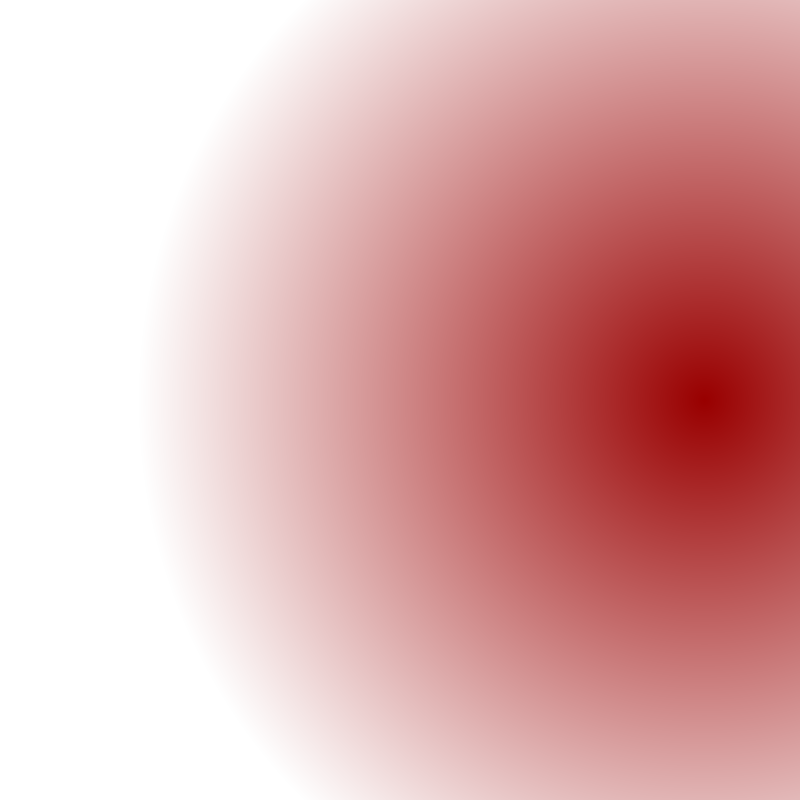

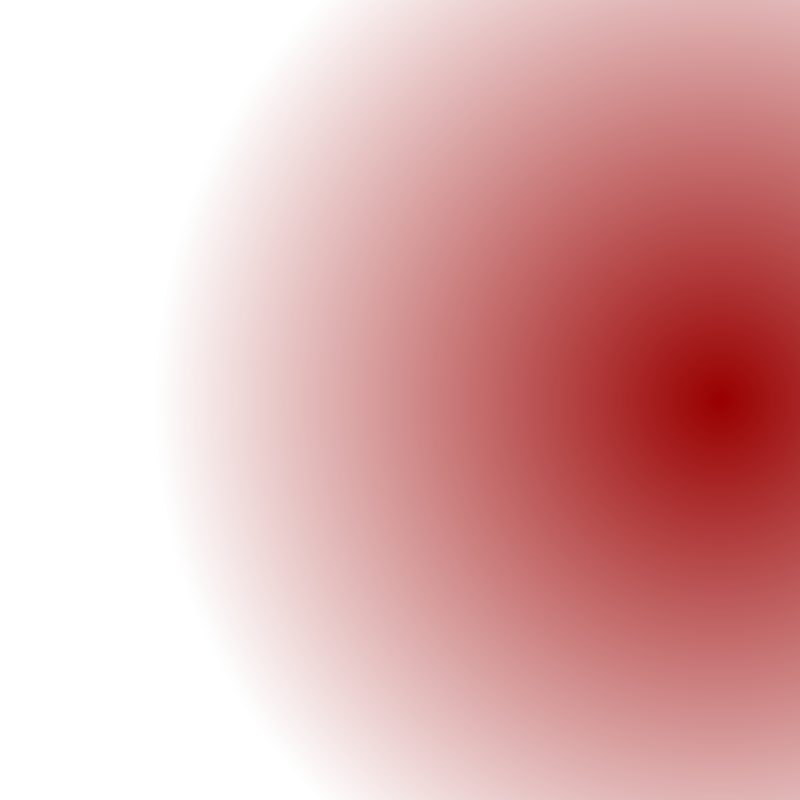

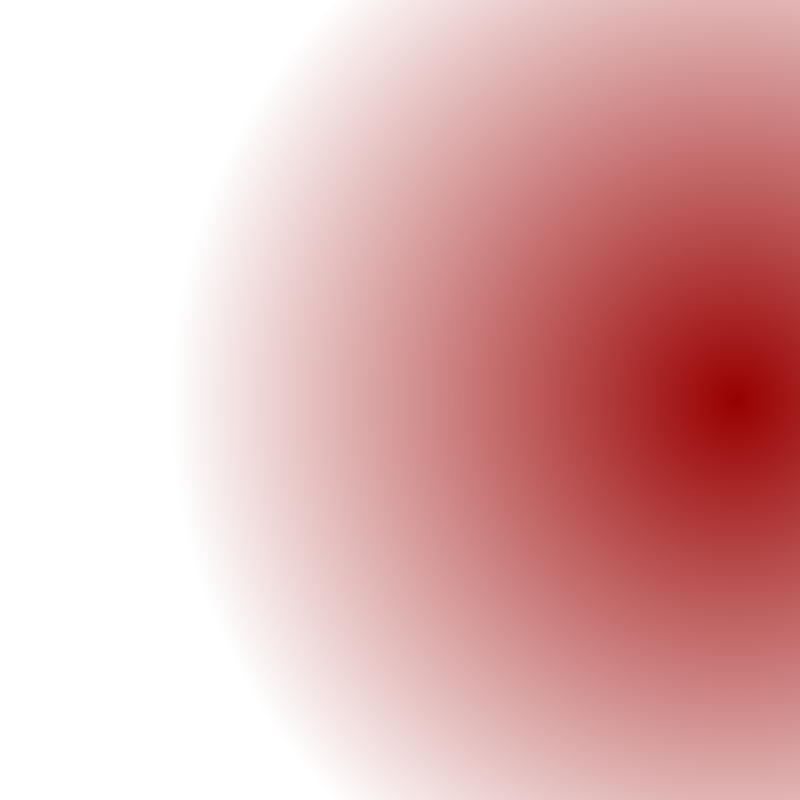

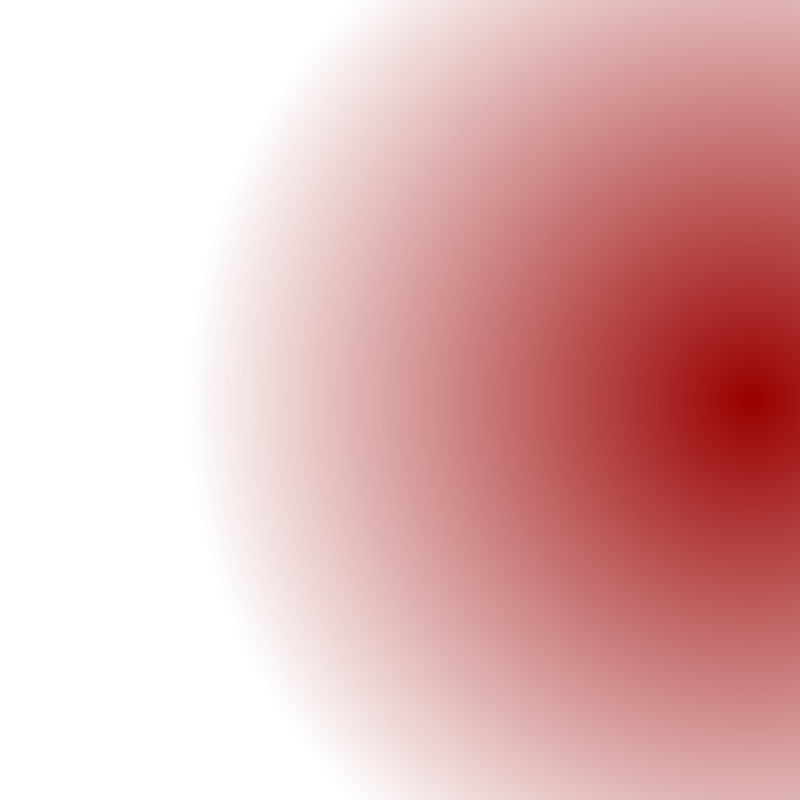

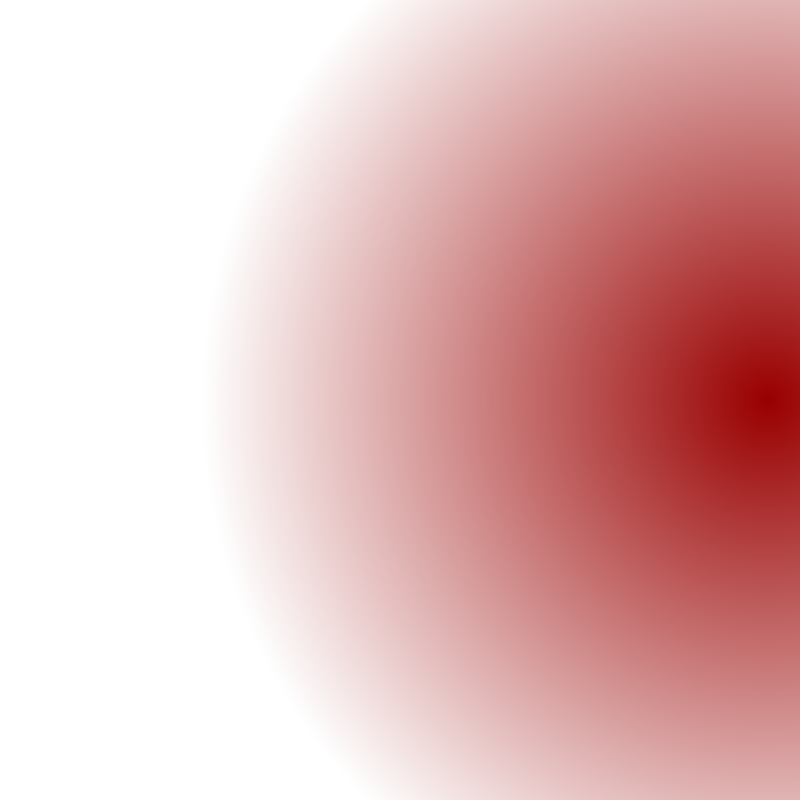

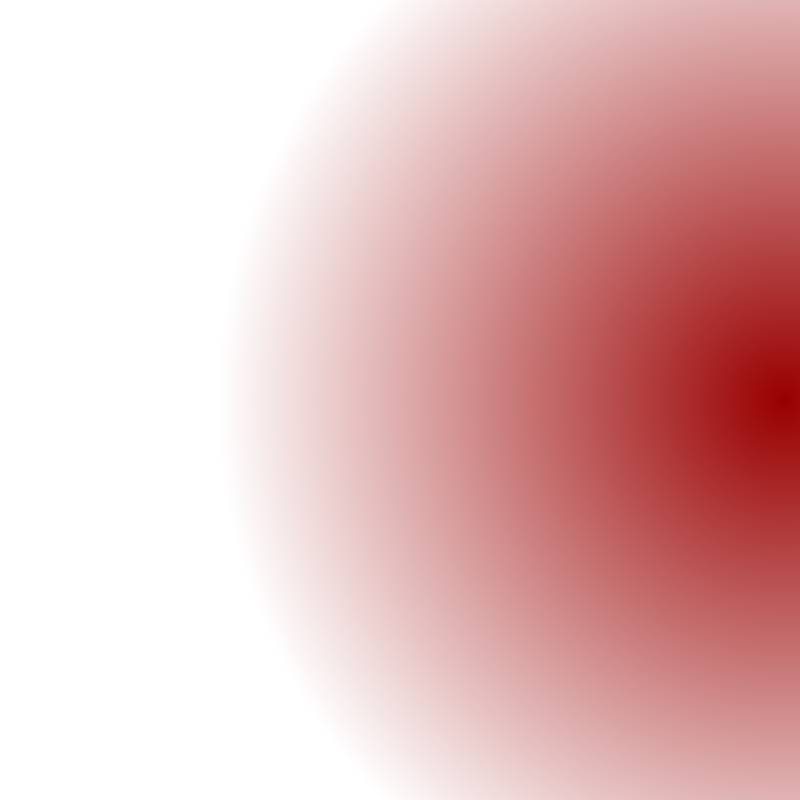

In [109]:
# BLUR

path = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/blur/train/'
imgsize=(800,800)
innerColor = [153,0,0]
n = 50
for i in range(n):
    image = Image.new('RGBA', imgsize)
    center = [int(i*800/n), 400]
    for y in range(imgsize[1]):
        for x in range(imgsize[0]):
            distanceToCenter = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
            distanceToCenter = float(distanceToCenter) / (np.sqrt(2) * imgsize[0]/2)
            r =  innerColor[0] + distanceToCenter * (255 - innerColor[0])
            g =  innerColor[1] + distanceToCenter * (255 - innerColor[1])
            b =  innerColor[2] + distanceToCenter * (255 - innerColor[2])
            image.putpixel((x, y), (int(r), int(g), int(b), int((1 - distanceToCenter) * 255)))
    image = image.convert("RGB")
    image.save(path+str(i).zfill(6)+'.png')
    display(image)

In [ ]:
import os
from PIL import Image
import numpy as np

img = Image.open('data/blur/train/000000.png')
# display(img)
print(np.array(img).shape)

In [ ]:
import os
from PIL import Image

img = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/lego2/train/r_2.png'
path = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/lego2/testfail'

for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        # print(os.path.join(root, name))

        im = Image.open(img)

        fill_color = (255,255,255)   # your new background color

        im = im.convert("RGBA")   # it had mode P after DL it from OP
        if im.mode in ('RGBA', 'LA'):
            background = Image.new(im.mode[:-1], im.size, fill_color)
            background.paste(im, im.split()[-1]) # omit transparency
            im = background
        # result = name.replace(".png", ".jpg")

        im.convert("RGB").save(os.path.join(root, name))

